# Pre-processing data

In this notebook we talk about some of the functions and methods that are commonly used to deal with numeric and categorical columns in our data in preparation for doing machine learning. Without properly preprocessing the data, our ML algorithm will either fail to execute or execute but return results that are incorrect or incomplete. Since we haven't introduced machine learning yet, it's too early to show examples of how this can happen, but we will see examples in future lectures.

As usual, let's begin by reading some data. We want to read the data and find some ways to summarize the data.

In [1]:
import pandas as pd
import numpy as np
# you need to run this to produce visualizations in a jupyter notebook
%matplotlib inline
pd.options.display.max_columns = 40
pd.options.display.max_rows = 100
pd.options.display.precision = 3

LocalFile = '../data/auto-mpg.csv'
UCI_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

# can read from a local file or appropriate URL
auto = pd.read_csv(UCI_url, sep = '\s+', header = None, 
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                            'acceleration', 'model year', 'origin', 'car_name'])
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Let's check the dataframe size and column data types:

In [2]:
display(auto.shape)
display(auto.dtypes)

(398, 9)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car_name         object
dtype: object

We can see that we have quite a few numeric columns in here. Numeric columns can be **integer**, **float**, or **datetime** columns. However, we also need to be careful: a column like `cylinders` looks numeric, but probably should be treated as a categorical column. Why? Ask yourself which one of these two is more likely:

- do any kind of math with `cylinders`, such as taking the log of it, adding it to another column, or being interested in knowing the average number of cylinders?
- use cylinder as a grouping variable, such as wanting to see the average horsepower **by cylinder**?

We can probably agree that the second case is more likely. For this reason, we need to think of these types of variables as categorical despite them having numeric values.

Let's now look at some distributions for our numeric columns.

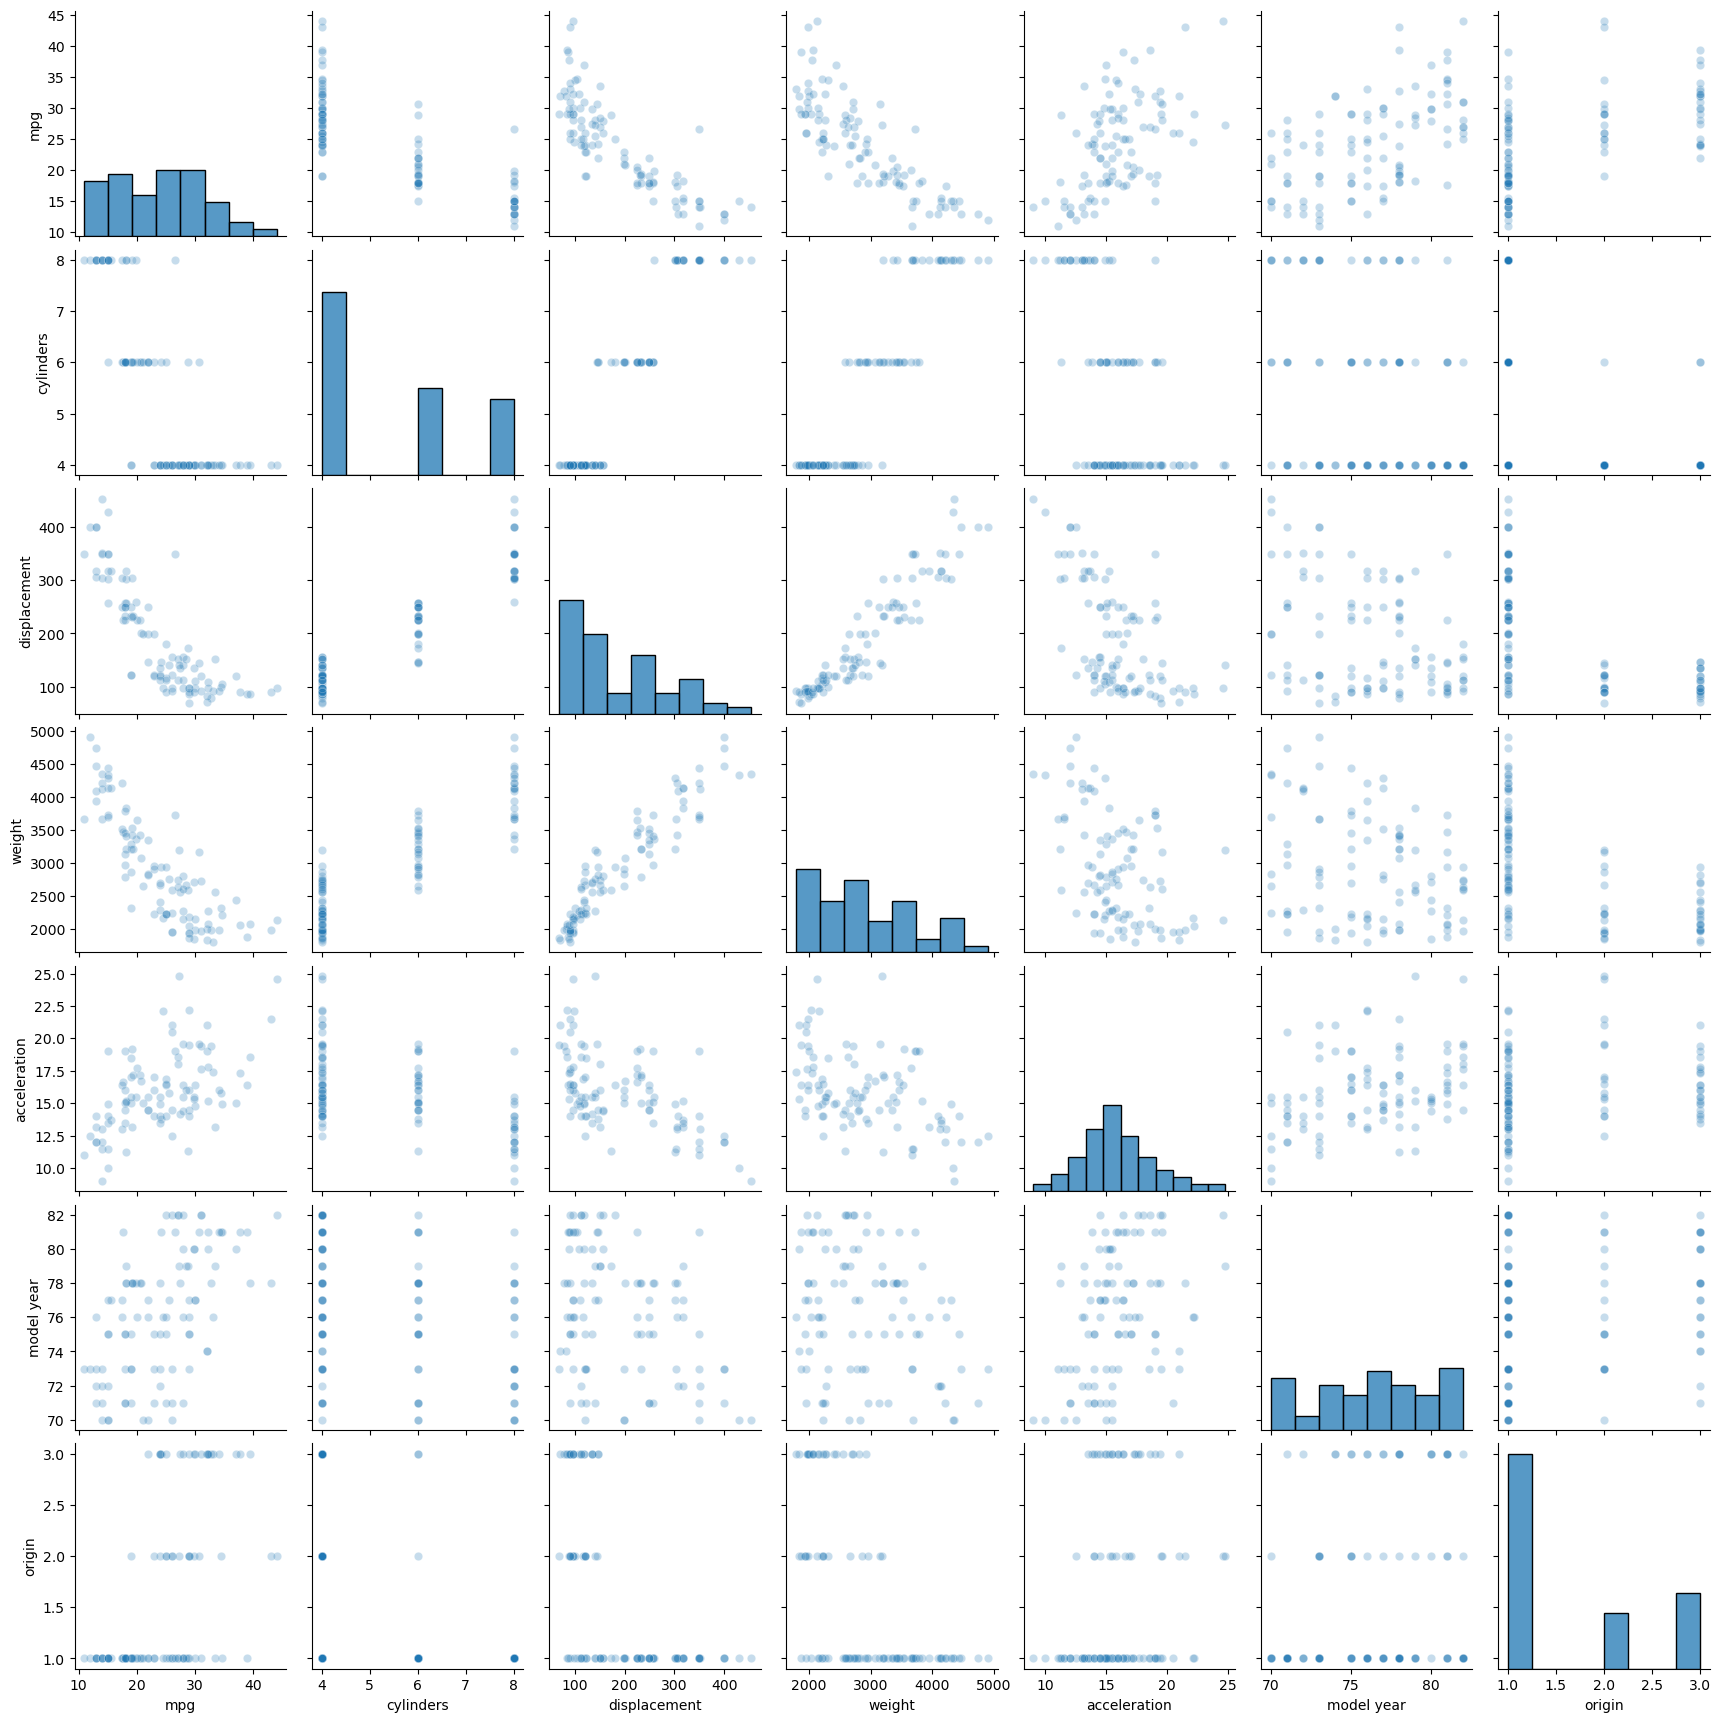

In [3]:
import seaborn as sns

sns.pairplot(auto.sample(100),  kind='scatter', plot_kws={'alpha':0.25});

None of the features seem to have any extreme values. Let's check for missing values. To see if any columns in the data are missing, we can use the `isnull` method, followed by `any` where the `axis = 0` is used to ask if **any** of values **across columns** is null: `False` means that none is missing, and `True` means that at least one value is missing.

In [4]:
auto.isnull().any(axis = 0)

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car_name        False
dtype: bool

Even better would be to use `sum` to get the count of values that are missing for each column.

In [5]:
auto.isnull().sum(axis = 0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car_name        0
dtype: int64

Note that all of this would work only if the missing data is properly marked as null. Often when reading external data sources, other conventions are used to mark data as missing, such as using `-999` for numeric data, or the string `NA` or `?` or the empty string for categorical data. Such values by default would not be picked up by `isnull`. So we would need to first recode them as `np.nan`.

### Exercise (8 minutes)

Let's illustrate the above point with an example, let's intentionally introduce a few missing values in the data, but using characters that won't be recognized as such.

In [8]:
auto.loc[2, ['mpg', 'car_name']] = [-999, ""] # make mpg and car_name in the 3rd row NA
# Add zero to origin of 4th car
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,-999.0,8,318.0,150.0,3436.0,11.0,70,1,
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


We look for the following occurrences to detect the missing values:
- inappropriate data types
- the length of strings in `car_name`
- outliers in numerical values
- A numerical value of zero (0) can be a stand-in for null.
- very common or very rare values:  Check number of unique values and if reasonable, review the values
- Unusual characters like question mark ("?"), blank (" "), empty (""), "x", "-"
  
How can we use a boolean indexer in `.loc` of `pandas` to find the missing values?

In [19]:
# Add code here
auto.loc[auto['mpg']<0, :]
auto.loc[auto['car_name']=="", :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
2,-999.0,8,318.0,150.0,3436.0,11.0,70,1,


In [17]:
print(auto['car_name'])
auto.loc[auto['car_name'].isna(), :]

0      chevrolet chevelle malibu
1              buick skylark 320
2                               
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car_name, Length: 398, dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name


- Replace the above missing values with `np.nan`

In [8]:
# Add code here

- Now show any rows in the data that have any missing values. HINT: you will need to use `any` with `axis = 1`.

In [9]:
# Add code here

We also can see from the scatter plot matrix that `weight` and `displacement` have a **positive relationship**.  A positive relationship means that as one goes up, so does the other. We may wonder if `cylinders` plays a part.

- Plot the scatter plot between `weight` and `displacement`, color-coded by `cylinders`.

In [10]:
# Add code here

- Obtain some basic summary statistics for the columns in `auto`. HINT: Use `describe`.

In [11]:
# Add code here

Notice that the result of `describe` itself looks like a `pandas` `DataFrame` or `Series`. That means that if we wanted to extract certain pieces out of it, we should be able to do it using the methods we learned for working with `DataFrame` objects.

- Extract the mean and standard deviation for acceleration from the results above and store them in variables called `acc_mean` and `acc_std`. Then print a statement that states what the mean and standard deviations are.

In [12]:
# Add code here

### End of exercise

There are other functions we can use to get additional summary statistics from the data. For example, notice that `describe` only shows us the 25th, 50th, and 75th **percentiles**. The $p$ th percentile is **a value such that $p$ percent of the data is below that value**, which means the remaining $1-p$ percent of the data is above that value. For example, if the 25th percentile for acceleration `mpg` is 17.5, then 25 percent of cars in our data have `mpg` below 17.0. The 50th percentile is also known as the **median**.

Looking at percentiles helps us get a feel for the distribution of the data. For example, looking at very low or very high percentiles can help us identify **outliers** or **extreme values**. We can use the `quantile` method to get any percentile we want:

In [14]:
auto.quantile(q = [0, 0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1],numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0.00,-999.000,3.00,68.00,1613.00,8.000,70.0,1.0
0.01,10.970,3.97,70.97,1772.61,9.485,70.0,1.0
0.05,13.000,4.00,85.00,1923.50,11.285,70.0,1.0
0.25,17.125,4.00,104.25,2223.75,13.825,73.0,1.0
0.50,23.000,4.00,148.50,2803.50,15.500,76.0,1.0
0.75,29.000,8.00,262.00,3608.00,17.175,79.0,2.0
0.95,37.030,8.00,400.00,4464.00,20.415,82.0,3.0
0.99,43.418,8.00,440.42,4951.03,22.239,82.0,3.0
1.00,46.600,8.00,455.00,5140.00,24.800,82.0,3.0


Now let's see how we can obtain these same summary statistics, but grouped by `cylinders`. There is already one way we know how to do that: we can first subset the data by `cylinders == 3` and run the summary statistics, then do the same for `cylinders == 4`, etc.

In [15]:
auto.loc[auto['cylinders'] == 3, :].describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,4.000,4.0,4.0,4.000,4.00,4.000,4.0
mean,20.550,3.0,72.5,2398.500,13.25,75.500,3.0
std,2.565,0.0,5.0,247.566,0.50,3.697,0.0
min,18.000,3.0,70.0,2124.000,12.50,72.000,3.0
25%,18.750,3.0,70.0,2278.500,13.25,72.750,3.0
50%,20.250,3.0,70.0,2375.000,13.50,75.000,3.0
75%,22.050,3.0,72.5,2495.000,13.50,77.750,3.0
max,23.700,3.0,80.0,2720.000,13.50,80.000,3.0


But of course the above way is tedious. Instead, we can use the `groupby` method to do it all at once. For example, here's the average of each column grouped by `cylinders`.

In [17]:
auto.groupby('cylinders').mean(numeric_only=True)

,mpg,displacement,weight,acceleration,model year,origin
cylinders,,,,,,
3,20.550,72.500,2398.500,13.250,75.500,3.000
4,29.287,109.797,2308.127,16.601,77.074,1.985
5,27.367,145.000,3103.333,18.633,79.000,2.000
6,19.986,218.143,3198.226,16.263,75.929,1.190
8,5.089,345.010,4114.718,12.955,73.903,1.000


A slightly confusing thing happens if we use `describe` instead of `mean`:

In [18]:
results_all = auto.groupby('cylinders').describe()
print("dataframe with multilevel columns:")
display(results_all)

dataframe with multilevel columns:


mpg                                                    \
           count    mean     std    min    25%    50%    75%   max   
cylinders                                                            
3            4.0  20.550   2.565   18.0  18.75  20.25  22.05  23.7   
4          204.0  29.287   5.710   18.0  25.00  28.25  33.00  46.6   
5            3.0  27.367   8.228   20.3  22.85  25.40  30.90  36.4   
6           84.0  19.986   3.807   15.0  18.00  19.00  21.00  38.0   
8          103.0   5.089  99.946 -999.0  13.00  14.00  16.00  26.6   

          displacement                                                        \
                 count     mean     std    min     25%    50%     75%    max   
cylinders                                                                      
3                  4.0   72.500   5.000   70.0   70.00   70.0   72.50   80.0   
4                204.0  109.797  21.512   68.0   91.00  105.0  121.25  156.0   
5                  3.0  145.000  33.287  121.0  126.00  131.0  157.00  183.0   
6                 84.0  218.143  32.294  145.0  199.75  228.0  250.00  262.0   
8                103.0  345.010  46.776  260.0  305.00  350.0  360.00  455.0   

          weight                             ... acceleration              \
           count      mean      std     min  ...          25%   50%   75%   
cylinders                                    ...                            
3            4.0  2398.500  247.566  2124.0  ...       13.250  13.5  13.5   
4          204.0  2308.127  347.094  1613.0  ...       14.800  16.2  18.0   
5            3.0  3103.333  374.344  2830.0  ...       17.900  19.9  20.0   
6           84.0  3198.226  332.297  2472.0  ...       15.075  16.1  17.6   
8          103.0  4114.718  448.833  3086.0  ...       11.500  13.0  14.0   

                model year                                                 \
            max      count    mean    std   min    25%   50%    75%   max   
cylinders                                                                   
3          13.5        4.0  75.500  3.697  72.0  72.75  75.0  77.75  80.0   
4          24.8      204.0  77.074  3.753  70.0  74.00  78.0  80.00  82.0   
5          20.1        3.0  79.000  1.000  78.0  78.50  79.0  79.50  80.0   
6          21.0       84.0  75.929  3.252  70.0  74.00  76.0  78.00  82.0   
8          22.2      103.0  73.903  3.021  70.0  72.00  73.0  76.00  81.0   

          origin                                         
           count   mean    std  min  25%  50%  75%  max  
cylinders                                                
3            4.0  3.000  0.000  3.0  3.0  3.0  3.0  3.0  
4          204.0  1.985  0.833  1.0  1.0  2.0  3.0  3.0  
5            3.0  2.000  0.000  2.0  2.0  2.0  2.0  2.0  
6           84.0  1.190  0.548  1.0  1.0  1.0  1.0  3.0  
8          103.0  1.000  0.000  1.0  1.0  1.0  1.0  1.0  

[5 rows x 48 columns]

The problem with the above table is that there's a lot of information packed in it. Each value of `cylinders` has its own row, which is fine. But the columns look like they have a hierarchical structure, which makes sense because we asked for many summary statistics for each column.

A pandas series is a 1-D collection of scalars.  A typical pandas dataframe is a 2-D collection of scalars.  `results_all` is a multilevel dataframe, which is a 3D collection of scalars.  The 3 Dimensions are:
1. Cylinder Values: [3, 4, 5, 6, 8]
2. Numeric Columns (except Cylinder): [mpg, displacement, weight, acceleration, model, year, origin]
3. Descriptive Statistics:  [count, mean, std, min, 25%, 50%, 75%, max]

So what if for example we wanted to look at the results for `acceleration` only. Turns out we can index the multilevel dataframe the same way we usually do:

In [19]:
print("One slice of a multilevel dataframe is a typical dataframe:")
display(results_all['acceleration'])

One slice of a multilevel dataframe is a typical dataframe:


,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.0,13.250,0.500,12.5,13.250,13.5,13.5,13.5
4,204.0,16.601,2.382,11.6,14.800,16.2,18.0,24.8
5,3.0,18.633,2.369,15.9,17.900,19.9,20.0,20.1
6,84.0,16.263,2.021,11.3,15.075,16.1,17.6,21.0
8,103.0,12.955,2.225,8.0,11.500,13.0,14.0,22.2


The difference with before is that `results_all['acceleration']` isn't just a single column, but is itself a `DataFrame`. That's because `results_all` has hierarchical columns, so its columns are themselves `DataFrame` objects. So if we want to drill further down to a specific column, such as `std`, we need to go one level deeper to get the series for the standard deviations of acceleration by cylinder.  We can even drill down one more level and request the standard deviation of acceleration for 3-cylinder vehicles.

In [20]:
print("series for the standard deviations of acceleration by cylinder:")
display(results_all['acceleration']['std'])
print("###################")
print("scalar for the standard deviation of acceleration for 3-cylinder vehicles:")
display(results_all['acceleration']['std'][3])

series for the standard deviations of acceleration by cylinder:


cylinders
3    0.500
4    2.382
5    2.369
6    2.021
8    2.225
Name: std, dtype: float64

###################
scalar for the standard deviation of acceleration for 3-cylinder vehicles:


0.5

So far it looks like hierarchical columns are not that complicated. However, things do get a little confusing when we want to cross the hierarchy the other way around. For example, let's say we want to quickly compare the standard deviations of all our columns, grouped by `cylinders`. This information is in the above table, but how do we extract it?

It turns out that to do this, we need to use the `IndexSlice` function in `pandas`. Here how it works:
- we use `loc` to say which rows and columns we want
- we use `slice(None)` to say we want everything at a given hierarchy
- if we want to filter at any level of hierarchy, we provide the index we want to filter by

In [21]:
from pandas import IndexSlice as idx
results_all.loc[: , idx[:, 'std']] # results_all.loc[: , idx[:, ['std', 'mean']]]

,mpg,displacement,weight,acceleration,model year,origin
,std,std,std,std,std,std
cylinders,,,,,,
3,2.565,5.000,247.566,0.500,3.697,0.000
4,5.710,21.512,347.094,2.382,3.753,0.833
5,8.228,33.287,374.344,2.369,1.000,0.000
6,3.807,32.294,332.297,2.021,3.252,0.548
8,99.946,46.776,448.833,2.225,3.021,0.000


By the way, the same way that we can have hierarchical columns, we can also have hierarchical rows, more specifically hierachical row indexes. Examine the result generated by the cell below. Do you see the hierarchical structure of the row index?

In [22]:
percentiles = np.arange(0, 1, 0.1)
auto.groupby('cylinders')[['mpg', 'displacement']].quantile(q = percentiles)

mpg  displacement
cylinders                          
3         0.0   18.00          70.0
          0.1   18.30          70.0
          0.2   18.60          70.0
          0.3   18.90          70.0
          0.4   19.50          70.0
          0.5   20.25          70.0
          0.6   21.00          70.0
          0.7   21.72          71.0
          0.8   22.38          74.0
          0.9   23.04          77.0
4         0.0   18.00          68.0
          0.1   23.00          85.0
          0.2   24.00          91.0
          0.3   26.00          97.0
          0.4   27.00          98.0
          0.5   28.25         105.0
          0.6   30.00         113.8
          0.7   32.00         120.1
          0.8   34.10         134.0
          0.9   37.00         140.0
5         0.0   20.30         121.0
          0.1   21.32         123.0
          0.2   22.34         125.0
          0.3   23.36         127.0
          0.4   24.38         129.0
          0.5   25.40         131.0
          0.6   27.60         141.4
          0.7   29.80         151.8
          0.8   32.00         162.2
          0.9   34.20         172.6
6         0.0   15.00         145.0
          0.1   16.06         168.0
          0.2   17.66         198.0
          0.3   18.00         200.0
          0.4   18.52         225.0
          0.5   19.00         228.0
          0.6   20.00         231.8
          0.7   20.62         232.0
          0.8   22.00         250.0
          0.9   23.85         250.0
8         0.0 -999.00         260.0
          0.1   12.00         302.0
          0.2   13.00         304.0
          0.3   13.00         318.0
          0.4   14.00         318.0
          0.5   14.00         350.0
          0.6   15.00         350.0
          0.7   16.00         351.0
          0.8   16.96         400.0
          0.9   18.18         400.0

Hierarchical indexes are called `MultiIndex` in `pandas`. This is a more advanced topic and we will leave it at that for now.

### Exercise (7 minutes)

We saw how a histogram shows us counts for **evenly-sized** intervals of a numeric column. But what if we wanted to see counts for any intervals we specify, evenly-sized or not? Here's an example:

- Find out how many cars have `mpg` less than 18, between 18 and 25, and 25 or more? HINT: There are many ways of doing this, so to narrow it down a little do this:
  - use `loc` to limit data to the above ranges
  - use the `shape` method to get row counts

In [35]:
# Add code here
low_count = auto.loc[auto['mpg']< 18].shape[0]
mid_condition = (auto['mpg'] >= 18) & (auto['mpg'] < 25)
mid_count = auto.loc[mid_condition].shape[0]
high_count = auto.loc[auto['mpg'] >= 25].shape[0]

print(low_count)
print(mid_count)
print(high_count)


108
121
169


- How many rows were not counted because they did not fall into any of these intervals?

In [24]:
# Add code here

There is another, much faster way to solve the exercise above: 

- Use the `pd.cut` function to bin `mpg` and specify `[0, 18, 25, 100]` as the cut-offs (the `bins` argument). Store the results as a new column in the data called `mpg_cat`.

In [25]:
# Add code here

- Use `value_counts` to get counts for `mpg_cat`.

In [26]:
# Add code here

- Create `mpg_cat` again, but make the following changes to it: 
  - Note that the choice of using 0 and 100 as the lower and upper bounds is a little arbitrary. So use `-np.Inf` and `np.Inf` instead.
  - By default, cut labels the categories based on the interval range it covers, but we can change the labels to anything we like using the `labels` argument. Rename the labels to `low`, `med` and `high`.

In [27]:
# Add code here

### Feature Summarization versus Feature Transformation
The `pd.cut` function is different from the other functions (or methods) we learned about so far. The `describe`, `mean`, `quantile`, or `value_counts` functions are **feature summarization** functions, but `pd.cut` is a **feature transformation** function, meaning that not only its input, but also its output are features. In the above example, the input to `pd.cut` was `mpg`, and the output was the `mpg_cat` which we chose to append to the data as a new column, but could have also been stored in a separate variable. Storing it as a separate variable is a good idea if the variable stores some intermediate values that we use as part of a transformation but don't need anymore afterwards. 

### End of exercise

## Working with categorical data

Let's now look at common tasks for treating **categorical data** prior to modeling. Categorical data needs a lot of attention during data pre-processing. This is because most machine learning algorithms don't deal directly with categorical data. Instead we need to **recode** the data from categorical into numeric, and we will see how we do that in this notebook.

Let's begin by reading some data. We will use a marketing data set of bank customers. You can read more about the data [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). 

In [28]:
import pandas as pd
import numpy as np

bank = pd.read_csv('../data/bank-full.csv', sep = ";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


We can see that our data contains many categorical columns, including the target itself. Let's check the data types:

In [29]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We can use the `select_dtypes` method to limit the data to just the categorical columns.

In [30]:
bank.select_dtypes('object').head() # bank.loc[:, bank.dtypes == 'object'].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


It turns out there are **two kinds of data types for categorical data** in `pandas`: `object` and `category`. By default, any non-numeric column will inherit the `object` type, but we can later convert it to `category` type. An `object` column type can be modified at will, but a `category` type is only appropriate for a column with **a limited number predefined categories**. This is because the `category` type is a more rigid data type with additional limitations on what they can store. So this only makes sense when the categories are known and few. Let's illustrate that by turning some of the columns in our data into `category` columns.

In [31]:
cat_cols = ['marital', 'default', 'housing', 'loan']
bank[cat_cols] = bank[cat_cols].astype('category')

Why would we want to add additional rigidity? Because this way we can impose some amount of **data integrity**. For example, if `marital` should always be limited to "single", "divorced" or "married" then by converting `marital` into a `category` column we can prevent the data from introducing any other category without first adding it as one of the acceptable categories for this column.

In [32]:
bank['marital'].cat.categories

Index(['divorced', 'married', 'single'], dtype='object')

### Exercise (6 minutes)

- Try to change the `marital` column at the second row to the value "widowed". You should get an error.

In [33]:
print('Is widowed a category in the marital column?  ', 'widowed' in bank['marital'].cat.categories)
# Uncomment the following line of code:
#bank.loc[1, 'marital'] = "widowed"

Is widowed a category in the marital column?   False


- To fix the error, you need to add "widowed" as one of the acceptable categories. Use the `cat.add_categories` method to add "widowed" as a category and then try again to make sure you don't get an error this time.

In [34]:
# Add code here

- Undo your change by reassigning the `marital` column at the second row to the value "single". Get a count of unique values for `marital` now. Do you notice anything? Explain what and why?

In [35]:
# Add code here

Categorical columns have other useful methods, and their names speak for themselves, such as
`as_ordered`, `as_unordered`, `remove_categories`, `remove_unused_categories`, `rename_categories`, `reorder_categories`, and `set_categories`. It is important to be aware of this functionality and use it when it makes sense. Of course an alternative to using these is to convert the column back to `object` and make all the changes we want and then turn it back into `category`, but using the above methods makes the code "cleaner".

So we saw that a `category` column has predefined categories and a set of methods specific to itself for changing the categories, whereas an `object` column is more a type of **free-form** column where any value is acceptable. One way the above distinction matters is when we need to rename the categories for a categorical column. Changing the categories of a categorical column is an example of **recoding** or **remapping**.

- Let's first begin with an example using `job`, which has type `object`. Rename the category "management" to "managerial". HINT: find all rows where `job` is the string `'management'`, and use `loc` to change those rows to the string `'managerial'`.

In [36]:
# Add code here

The above approach works fine, but it's tedious if we have a lot of changes we want to make. The better way to do it is to create a Python dictionary that maps old values (values we want to change) to new values, then use the `replace` method to replace them all at once.

- Create such a dictionary and use `replace` to make the following changes in the `job` column:

  - rename `'student'` to `'in-school'`
  - consolidate `'housemaid'` and `'services'` into a single group called `'catering'`
  - change `unknown` to a missing value, i.e. `np.NaN` (without quotes)

In [37]:
# Add code here

- The above transformation was a renaming and a consolidation (grouping, binning) of categories!

- Get a count of unique values for `job` to make sure everything worked. Note that `value_counts()` does not provide a count for missing values by default. We need to specify `dropna = False` to include missing values in the count.

In [38]:
# Add code here

### End of exercise

The `replace` method works equally well with a column of type `category`, however **it changes its type to `object`!** So either we have to convert it back to `category`, or we need to use the `rename_categories` method to replace values, which works very similarly to `replace`. Here's an example:

In [39]:
bank['marital'] = bank['marital'].cat.rename_categories({'married': 'taken'})
bank['marital'].value_counts()

marital
taken       27214
single      12790
divorced     5207
Name: count, dtype: int64

Categorical columns can also be easily generated from numeric columns. For example, let's say we want to have a column called `high_balance` that is `True` when balance exceeds $2,000 and `False` otherwise. Technically this would be a boolean column, but in practice it acts as a categorical column. Generating such a column is very easy. We refer to such binary columns as **dummy variables** or **flags** because they single out a group.

In [40]:
bank['high_balance'] = bank['balance'] > 2000

In [41]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,high_balance
0,58,management,taken,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,True
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,False
2,33,entrepreneur,taken,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,False
3,47,blue-collar,taken,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,False


The process of creating a dummy variable **for each category** of a categorical feature is called **one-hot encoding**. Let's see what happens if we one-hot-encode `marital`.

In [42]:
bank['marital_taken'] = (bank['marital'] == 'taken').astype('int')
bank['marital_single'] = (bank['marital'] == 'single').astype('int')
bank['marital_divorced'] = (bank['marital'] == 'divorced').astype('int')

In [43]:
bank.filter(like = 'marital').head()

,marital,marital_taken,marital_single,marital_divorced
0,taken,1,0,0
1,single,0,1,0
2,taken,1,0,0
3,taken,1,0,0
4,single,0,1,0


One-hot encoding is a common enough task that we don't need to do it manually like we did above. Instead we can use `pd.get_dummies` to do it in one go.

In [44]:
pd.get_dummies(bank[['marital', 'job']], prefix = ['marital', 'job']).head()

,marital_divorced,marital_taken,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True


There's an even more streamlined way to do one-hot encoding, although at first blush it appears less straight-forward, but there is a reason it is set up this way and we will explain that later. Just like normalization, one-hot-encoding is a common pre-processing task and we can turn to the `sklearn` library to do the hard part for us.

In [46]:
from sklearn.preprocessing import OneHotEncoder

bank_cat = bank.select_dtypes('category').copy() # only select columns that have type 'category'
onehot = OneHotEncoder() # initialize one-hot-encoder
onehot.fit(bank_cat)
col_names = onehot.get_feature_names_out(bank_cat.columns) # this allows us to properly name columns
bank_onehot =  pd.DataFrame(onehot.transform(bank_cat), columns = col_names)
bank_onehot.head()

ValueError: Shape of passed values is (45211, 1), indices imply (45211, 9)

So we can see that one-hot encoding created a **binary feature** for **each category of each categorical column** in the data. Although to be more specific, we limited it to columns whose type is `category` and excluded columns whose type is `object`. This is because one-hot encoding can quickly blow up the number of columns in the data if we are not careful and include categorical columns with lots of categories (also called **high-cardinality** categorical columns). In such cases, we would one-hot encode only the top $n$ categories (what $n$ should be and what "top" should mean depends on the context). Another 

What is the point of doing this? The reason we do this is that most machine learning algorithms do not work **directly** with categorical data, so we need to encode the categorical data which turns it into numeric data. One-hot encoding is just one type of encoding, but it is the most common one.

One last note about the `sklearn` pre-processing transformations we learned about in this notebook: If you look at examples online, you may notice that instead of calling `fit` and `transform` separately, you can call `fit_transform` which combines the two steps into one. This may seem reasonable and saves you one extra line of code, but we discourage it. The following exercise will illustrate why, but the main reason will become clear when we talk about machine learning.

### Exercise (5 minutes)

We want to one-hot-encode the `education` and `month` columns in bank. 

- First create an instance of the one-hot encoder and invoke fit and transform with fit_transform using the `education` and `month` columns in bank.

In [ ]:
# Add code here

Create new "hybrid" column names for the new one-hot-encoded values.  The column names are a hybrid of the original column name and the column values.

In [ ]:
# Add code here

Create a new dataframe out of the one-hot-encoded values and the new column names

In [ ]:
# Add code here

Concatenate the new dataframe of the new one-hot-encoded columns to the original bank dataframe and then drop the original `education` and `month` columns

In [47]:
# Add code here

### End of exercise

One final note about one-hot encoding: there are more sophisticated ways that we can perform one-hot encoding by using hash functions. We leave the reader to read about **feature hashing** (if you know what **hash functions** are, then feature hashing is very easy to grasp). This method has the advantage that we do not need to know what the categories are ahead of time. Not only does this free us from keeping track of the categories, but it also means that we don't have to load the predefined list of categories with the model **at score time** when the model is deployed: We just use the hash function to compute it on the fly. This can make scoring much more efficient when the size of features is large.

# Assignment (Lesson 05)
# Data Preparation and Feature Selection
Steps in a data science project
1. Acquire data
2. Exploratory Data analysis (EDA)
3. Data Processing
    1. Data Preparation
    2. Feature Selection
4. Predictive Analytics

### Import Packages
Python, like most programming languages, has pre-made software methods.  These pre-made software methods are organized and combined by topic into packages.  The packages that we want are:
- numpy (numerical python)
- pandas (panel data aka tables)
- sklearn (sci-kit learn for predictive analytics)
- matplotlib (data plotting for matrix-like data)  

We need to "import" these packages so that we can use their methods in our code.

In [1]:
# import packages
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
# Allow inline plotting in Jupyter Notebook
%matplotlib inline

## Data Preparation on the Mammographic Masses Dataset (Mamm)
### Acquire data
We will get our data from the University of California, Irvine Machine Learning Repository.  Our dataset was used to determine the effectiveness of radiological evaluations of breast cancer diagnoses in women who have breast tumors.  You can get some information on the data from here:  http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.names

In [2]:
# csv file:
url = "../data/mammographic_masses.data"
# Alternate data source:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data"

# Download the data
Mamm = pd.read_csv(url, header=None)

# Replace the default column names (0, 1, 2, 3, 4, 5) with meaningful names
Mamm.columns = ["BI_RADS", "Age", "Shape", "Margin", "Density", "Severity"]

Mamm.head()

,BI_RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


### Some preliminary EDA:
"BI_RADS", and "Density" are ordinal columns.  We will assume that they are numeric.  
"Age" and "Severity" are numeric columns.    
"Shape" and "Margin" are category columns but they are encoded as integers.  

Show the actual data types of these columns.  Can you guess why the data types of these 5 columns are `object`?

<span style="color:red" float:right>[0 point]</span>

In [7]:
# Add code here
Mamm.dtypes

BI_RADS     object
Age         object
Shape       object
Margin      object
Density     object
Severity     int64
dtype: object

Why the data types of these 5 columns are object? Even though they all look numeric, their types not integers indicate that there might be missing values, NA values or symbols that are considered string. 

### Some Data Processing
In the following sections you will do the following to the Mamm dataframe:
- Replace unusable entries with null/nan  
- Change types of data.
- Correct unexpected values (outliers)
- decode category data    
- Consolidate categories in category data 

#### Replace Missing Values with Nulls
Coerce all columns, even category columns, that contain missing values to numeric data using `pd.to_numeric`.  You might get an error, like `Unable to parse string`.  You need to tell `pd.to_numeric` that it should **coerce** the casting when it encounters a value that it cannot parse.  The category columns in this dataset are encoded as integers.  We will make use of that encoding.  Any non-numeric value will be replaced with a nan and you will get nans for missing numeric and category values.  After you replace all the non-numeric values, present the first five rows with `Mamm.head()`.

<span style="color:red" float:right>[1 point]</span>

In [11]:
# Coerce all the data to numeric data
# Coercion will introduce nans/nulls for the non-numeric values in all columns
# Because the categories are encoded as integers, the missing categories will also be nans/nulls after coercion.
# Add code here

# Coerce all columns to numeric
for col in Mamm.columns:
    Mamm[col] = pd.to_numeric(Mamm[col], errors='coerce')

print(Mamm.head())
print(Mamm.dtypes)

   BI_RADS   Age  Shape  Margin  Density  Severity
0      5.0  67.0    3.0     5.0      3.0         1
1      4.0  43.0    1.0     1.0      NaN         1
2      5.0  58.0    4.0     5.0      3.0         1
3      4.0  28.0    1.0     1.0      3.0         0
4      5.0  74.0    1.0     5.0      NaN         1
BI_RADS     float64
Age         float64
Shape       float64
Margin      float64
Density     float64
Severity      int64
dtype: object


#### Replace Outliers
Values that are obviously incorrect are often replaced with averages.  Often, outlier replacements with averages are inappropriate because the extreme values have some meaning.  For instance, from the data dictionary we know that BI_RADS should range from 1 to 5.  BI_RADS values beyond 1 and 5 were added by physicians who did not adhere to the accepted range.  In this case, BI_RADS greater than 5 should be "clipped" at 5 and BI_RADS less than 1 should be "clipped" at 1. 

<span style="color:red" float:right>[1 point]</span>

In [ ]:
# Cap BI_RADS values to a range of 1 to 5
# Add code here

### Consolidate and decode category columns

Decoding a category is when categories are coded as numbers and we replace those numbers with actual categories.  
Consolidating (aka binning or grouping) of categories means that multiple categories are renamed to a single category.  
The decoding and consolidating of categories can occur at the same time.  

- Shape
 - The original category codes are: round=1; oval=2; lobular=3; irregular=4;  
 - The proper consolidated category decoding is: 1 $\rightarrow$ oval; 2 $\rightarrow$ oval; 3 $\rightarrow$ lobular; 4 $\rightarrow$ irregular;  
- Margin
 - The original category codes are: circumscribed=1; microlobulated=2; obscured=3; ill-defined=4; spiculated=5  
 - The proper consolidated category decodes are: 1 $\rightarrow$ circumscribed; 2 $\rightarrow$ ill-defined; 3 $\rightarrow$ ill-defined; 4 $\rightarrow$ ill-defined; 5 $\rightarrow$ spiculated;

After you decode and consolidate, present the first five rows with `Mamm.head()`. 

<span style="color:red" float:right>[1 point]</span>

In [ ]:
# The category columns are decoded and categories are consolidated

# The Shape variable is decoded as follows:  1 and 2 to oval;  3 to lobular; 4 to irregular
# Add code here

# The Shape variable is decoded as follows:  1 to circumscribed;  2, 3, 4 to ill_defined; 5 to spiculated
# Add code here

# Present the first few rows
# Add code here

### Some More EDA
- Show the shape of the dataframe
- Use the `pandas` `isna` method to show the distribution of nulls among the columns.
  
<span style="color:red" float:right>[0 point]</span>

In [ ]:
# Show the shape of the data frame
# Add code here

# Show the distribution of nulls among the columns
# Add code here

### Drop Rows with Multiple Missing Values
When a row has too many missing values, then it should not be used.  We can stipulate a threshold requirement of available values per row.  We will require that each row contains at least 5 values.  This requirement means that no row is allowed more than 1 missing value.  
Remove the rows that have more than one missing value.  
- Use the `pandas` `dropna` method and set the `thresh` argument.  
- Show the shape of the dataframe after you drop the rows with multiple nulls. 
- Use the `pandas` `isna` method to show the number of nulls per column after dropping rows with multiple nulls

<span style="color:red" float:right>[1 point]</span>

In [ ]:
# Drop rows
# Add code here

# Show the shape of the data frame
# Add code here

# Show the distribution of nulls among the columns
# Add code here

## Impute Missing Values
Use the median values to impute missing values for true numerical columns (`Age`, `BI_RADS`, `Density`).  `Margin` and `Shape` originally looked numeric, but they are categorical.  Therefore, do not use median on `Margin` and `Shape`.  

### Determine the imputation values for Age

In [ ]:
# Replace missing age values with the median 
MedianAge = np.nanmedian(Mamm.loc[:,"Age"])
HasNanAge = pd.isnull(Mamm.loc[:,"Age"])
print('Now we replace', HasNanAge.sum(),'missing age values with the age median (', MedianAge, ')')
Mamm.loc[HasNanAge, "Age"] = MedianAge
Mamm.isna().sum(axis=0)

### Impute Missing values for BI_RADS and Density
Assign the column medians to the null values in the respective numeric columns.
- Use the `pandas` `isnull` method to identify the nulls
- Use the `numpy` `nanmedian` to determine the median for imputation
- Use the `pandas` `isna` method to show the number of nulls per column after the imputation   
  
<span style="color:red" float:right>[1 point]</span>

In [ ]:
# Median Imputation for BI_RADS
# Add code here

# Median Imputation for Density
# Add code here

# Distribution of nulls
# Add code here

### Replace missing values for the two categorical columns
- Use `pandas` `value_counts()` method to determine the distribution of categories in `Shape` and `Margin` before imputation.
- Use the `pandas` `isnull()` method to identify the missing values
- Assign the most common value to the null values in the respective categorical columns. 
- After the imputation, use the `pandas` `isna` method to show the number of nulls after the imputation.
- Use the `pandas` `value_counts()` method to determine the distribution of categories after imputation.

<span style="color:red" float:right>[1 point]</span>

In [ ]:
# Determine the distribution of categories for Shape
# Add code here

# Replace nulls in Shape with the most common category of Shape
# Add code here

# Determine the distribution of categories for Margin
# Add code here

# Replace nulls in Margin with the most common category of Margin
# Add code here

# Distribution of nulls
# Add code here

# Determine the distribution of categories
# Add code here

### One hot encode the categorical variables
- Use `OneHotEncoder` from `sklearn.preprocessing` to one-hot encode the two categorical variables, `Shape` and `Margin`.
- Make sure that the new columns have descriptive hybrid names by using the `get_feature_names_out` method.
- Add the new binary columns to the dataframe.
- drop the original columns, `Shape` and `Margin`
- Show the first few rows of the dataframe.

<span style="color:red" float:right>[3 point]</span>

In [ ]:
# get package
# Add code here

# One-hot-encode
# Add code here

# Create Column Names
# Add code here

# Add one-hot-encoded columns to dataframe
# Add code here

# Drop original categorical columns
# Add code here

# Show the first few rows
# Add code here

## End of Data Preparation on the Mammographic Masses Dataset (Mamm)



## Feature Selection on the Indian  Liver Patient Dataset (ILPD)
Feature selection is a process of removing features that are redundant and that could lead to overfitting, singular matrices, and other problems associated with high cardinality (Curse of dimensionality:  https://en.wikipedia.org/wiki/Curse_of_dimensionality)

### Acquire Data

We will get our data from the University of California, Irvine Machine Learning Repository. Our dataset was used to determine if blood test data could be sufficient to identify liver disease in rural areas with few physicians.

In [ ]:
# csv file:
url = "../data/Indian Liver Patient Dataset (ILPD).csv"
# Alternate data source:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian Liver Patient Dataset (ILPD).csv"
url = url.replace(" ", "%20")

# Download the data
ILPD = pd.read_csv(url, header=None)

# Replace the default column names (0, 1, 2, 3, 4, 5) with meaningful names
ILPD.columns = ["Age","Gender","DB","TB","Alkphos","Sgpt","Sgot","TPr","ALB","AGRatio","Selector"]

ILPD

### Data Preparation for ILPD
- All columns should be numeric and continuous
    - Remove binary columns (numeric and categorical) because their mutual information scores will be lower
    - Remove any categorical columns
- Remove or impute any missing values

<span style="color:red" float:right>[1 point]</span>

In [ ]:
# Drop Binary Columns
# Add Code here

# Impute values or remove rows with nulls
# Add Code here

### Mutual Information
https://en.wikipedia.org/wiki/Mutual_information
Below is a wrapper for determining the mutual information between two continuous (numeric) variables

In [ ]:
from sklearn.metrics import mutual_info_score
# x is the first input variable
# y is the second input variable
# bins is the number of discretized values that will be used for the two input variables
def calc_MI(x, y, bins=80):
    if (bins > 1):
        c_xy = np.histogram2d(x, y, bins)[0]
        mi = mutual_info_score(None, None, contingency = c_xy)
    else:
        mi = mutual_info_score(x, y)
    return mi

### Create method to list  all column pairs together with their mutual information score
Write a method called `listMutualInformationScores`.  It uses the above method (`calc_MI`) in a loop to find the mutual information between all possible pairs of columns in the data.  The input to the function is the dataframe of continuous variables, specifically the prepared ILPD dataset.  

The method returns a list of lists.  Each inner list contains three items:  the x-column, the y-column, and the mutual information score. The list of lists contains every possible pair of columns in the data.  The result should have a form similar to the following, except that the outer list is much longer and contains all possible column pairs:  
`[['Alkphos', 'Sgot', 0.33],
['Sgot', 'AGRatio', 0.23],
['Age', 'Sgot', 0.35],
['Sgpt', 'AGRatio', 0.30],
['Sgot', 'ALB', 0.29],
['Sgot', 'TPr', 0.33]]`

<span style="color:red" float:right>[3 point]</span>

In [ ]:
# define the method listMutualInformationScores
# Add code here

In [ ]:
# Run the method listMutualInformationScores
# Add code here

### Present the mutual information results
- Package the output into a dataframe
- Sort the rows in descending order of mutual information
- Present the dataframe

The first column could be x, the second column could be called y and the third column could be called mi.  x and y are the pair of columns and mi is the pair's mutual information score.  The result should have a form similar to the following:

| x | y | mi |
| --- | --- | --- |
| Age | Sgot | 0.35 |
| Sgot | TPr | 0.33 |
| Alkphos | Sgot | 0.33 |
| Sgpt | AGRatio | 0.30 |
| Sgot | ALB | 0.29 |
| Sgot | AGRatio | 0.23 |

<span style="color:red" float:right>[1 point]</span>

In [ ]:
# Present the results as dataframe
# Add code here

### Discussion on Mutual Information in ILPD
Let's assume a threshold of 1 for the mutual information score
Which columns would you eliminate? Why?  To answer these questions, you may need to read-up on feature selection with mutual information score.

<span style="color:red" float:right>[1 point]</span>

Add discussion here 